In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [183]:
#Loading Train & Test Data
train = pd.read_csv("C:\\Users\\hp\\Desktop\\Liner_train.csv", index_col= "Id")
test = pd.read_csv("C:\\Users\\hp\\Desktop\\Liner_test.csv", index_col="Id")

In [184]:
train.sample(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1440,60,RL,80.0,11584,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,197000
1189,60,RL,68.0,8935,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,195000
335,60,RL,59.0,9042,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,192000
1184,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,120000
1136,30,RM,60.0,6180,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,102000
1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000


In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

##### Data Preprocessing

1) Removing highest impacting Outliers

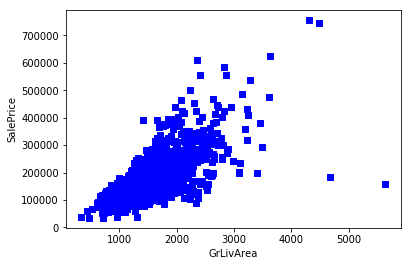

In [186]:
plt.scatter(train.GrLivArea,train.SalePrice, c="blue", marker = "s")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

#Per check, 2 outliers which has greater living area but sold at very less price. Which needs to be removed

In [187]:
train = train[train.GrLivArea < 4500]

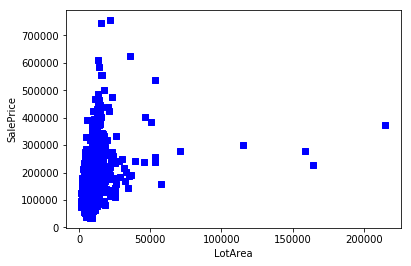

In [188]:
plt.scatter(train.LotArea,train.SalePrice, c="blue", marker = "s")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

#Similarly LotArea>150000 consider as outlier and remove from dataset

In [189]:
train = train[train.LotArea < 150000]

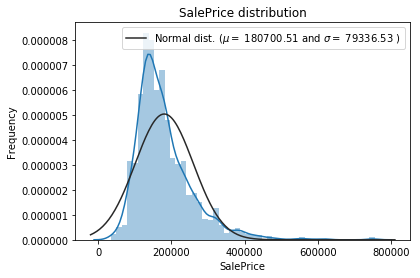

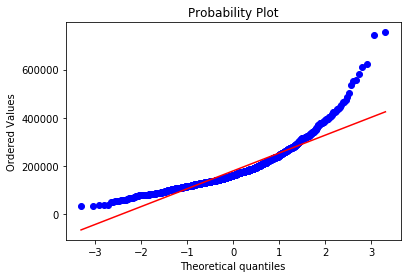

In [190]:
#Analysis on Target Variable
from scipy import stats
from scipy.stats import norm

sns.distplot(train['SalePrice'], fit= norm);

(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Per check SalePrice is highly right skewed with large kurtosis


#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

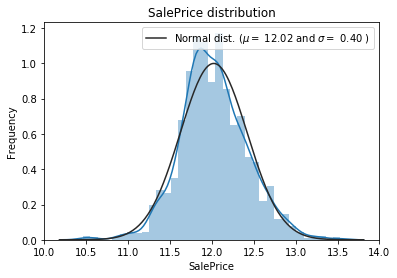

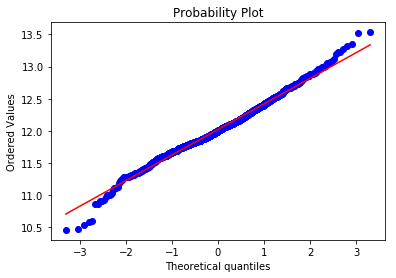

In [191]:
#In order for better prediction, we need to fit the target variable into Normal Dist, hence we go for log transformation
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#Now, the target variable is more or less similar to Norm Dist...

##### Data Preprocessing

2) Check for NAN Values & Fix it

In [192]:
ntrain = train.shape[0]
ntest = test.shape[0]
ytrain = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop = True)
data.drop(['SalePrice'], axis = 1, inplace = True)
data.shape

(2914, 79)

In [193]:
print((data.values == 'Abnorml').sum())
col_idx = pd.np.argmax(data.values == 'Abnorml', axis=1).max()
data.iloc[:, col_idx].value_counts()

190


Normal     2399
Partial     243
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [194]:
print((ytrain == 'Abnorml'))

False


In [195]:
missing = []
for col in data:
    count = data[col].isnull().sum(axis = 0)
    if count:
        missing.append(col)
        print("%s : %d" %(col, count))

Alley : 2716
BsmtCond : 82
BsmtExposure : 82
BsmtFinSF1 : 1
BsmtFinSF2 : 1
BsmtFinType1 : 79
BsmtFinType2 : 80
BsmtFullBath : 2
BsmtHalfBath : 2
BsmtQual : 81
BsmtUnfSF : 1
Electrical : 1
Exterior1st : 1
Exterior2nd : 1
Fence : 2343
FireplaceQu : 1420
Functional : 2
GarageArea : 1
GarageCars : 1
GarageCond : 159
GarageFinish : 159
GarageQual : 159
GarageType : 157
GarageYrBlt : 159
KitchenQual : 1
LotFrontage : 484
MSZoning : 4
MasVnrArea : 23
MasVnrType : 24
MiscFeature : 2811
PoolQC : 2905
SaleType : 1
TotalBsmtSF : 1
Utilities : 2


In [196]:
data_na = (data.isnull().sum() / len(data))*100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : data_na})
missing_data

,Missing Ratio
PoolQC,99.691146
MiscFeature,96.465340
Alley,93.205216
Fence,80.404942
FireplaceQu,48.730268
LotFrontage,16.609472
GarageQual,5.456417
GarageCond,5.456417
GarageFinish,5.456417
GarageYrBlt,5.456417


Text(0,0.5,'% of NAN Values')

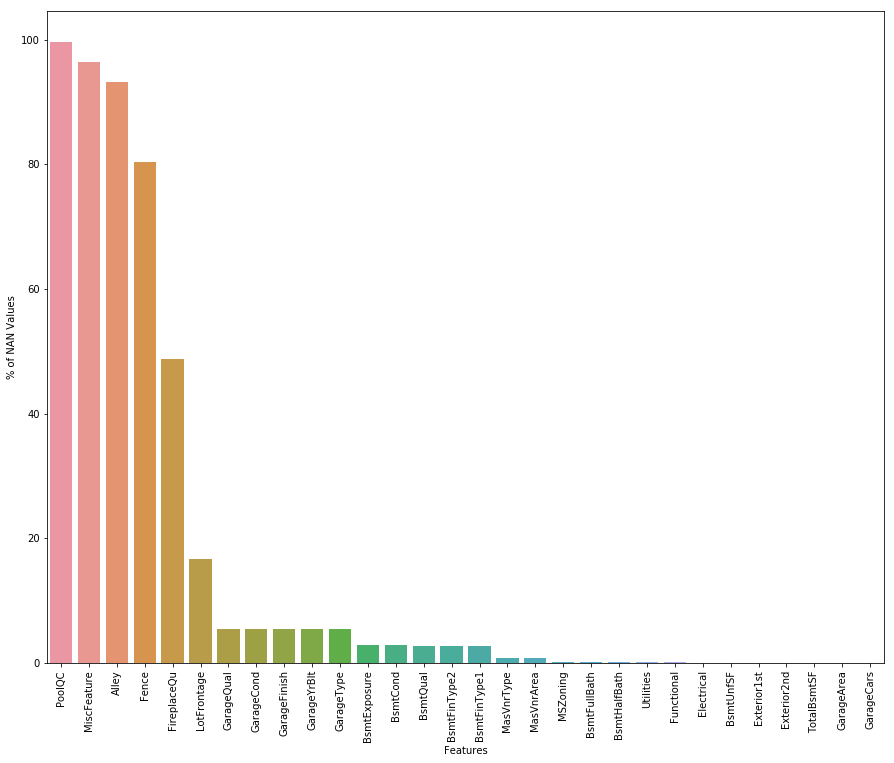

In [197]:
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y = data_na)
plt.xlabel('Features')
plt.ylabel("% of NAN Values")

SalePrice        1.000000
OverallQual      0.823084
GrLivArea        0.724695
GarageCars       0.681712
GarageArea       0.657553
TotalBsmtSF      0.645891
1stFlrSF         0.618853
FullBath         0.595355
YearBuilt        0.589170
YearRemodAdd     0.568770
GarageYrBlt      0.545018
TotRmsAbvGrd     0.537353
Fireplaces       0.489343
MasVnrArea       0.435625
BsmtFinSF1       0.389996
LotFrontage      0.369665
LotArea          0.341680
WoodDeckSF       0.336752
OpenPorchSF      0.326795
2ndFlrSF         0.321438
HalfBath         0.317207
BsmtFullBath     0.233963
BsmtUnfSF        0.224328
BedroomAbvGr     0.208101
ScreenPorch      0.122283
PoolArea         0.074681
MoSold           0.057129
3SsnPorch        0.055364
BsmtFinSF2      -0.001923
BsmtHalfBath    -0.008165
MiscVal         -0.021482
OverallCond     -0.037534
LowQualFinSF    -0.037696
YrSold          -0.038030
MSSubClass      -0.074768
KitchenAbvGr    -0.147268
EnclosedPorch   -0.148362
Name: SalePrice, dtype: float64


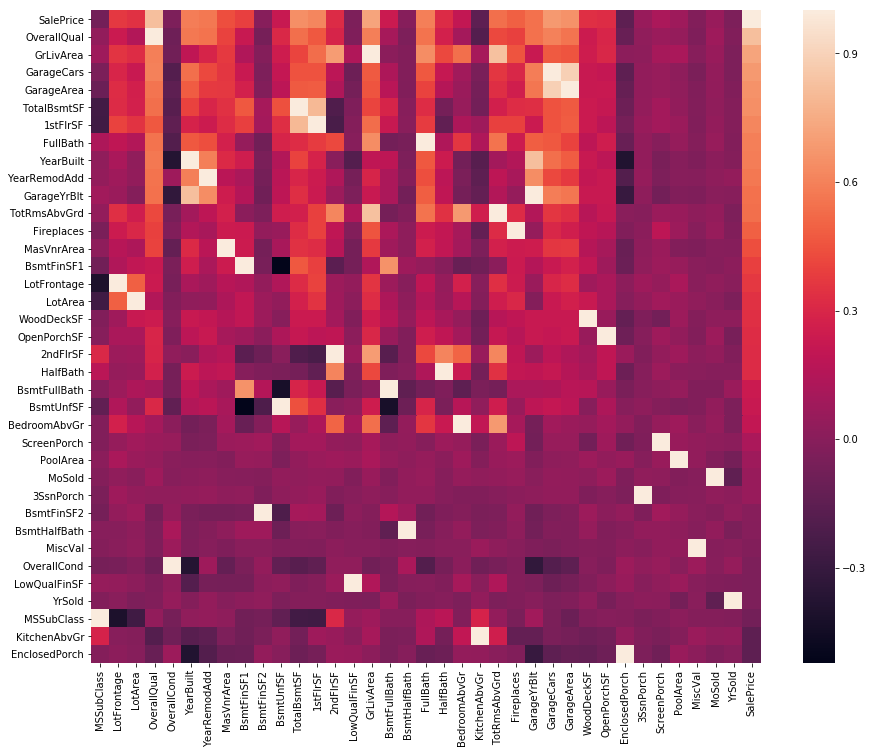

In [198]:
corrmat = train.corr()
corrmat.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corrmat.SalePrice)
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat)

### Imputing Missed Values for each features one by one depending on their data type

In [199]:
#PoolQC - Indicates houses with No POOL, hence for missing values we will fill with NONE
data['PoolQC'] = data['PoolQC'].fillna('None')

In [200]:
#MiscFeature - Similar to above no Miscellaneous Feature available for that house, hence fill NONE
data['MiscFeature'] = data['MiscFeature'].fillna('None')

In [201]:
#Alley - NA means no Passage access
data['Alley'] = data['Alley'].fillna('None')

In [202]:
#Fence - NA indicates no fence , hence NONE
data['Fence'] = data['Fence'].fillna('None')

In [203]:
#FirePlaceQu - NA means no seperate FirePlace available, hence NONE
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

In [204]:
#Frontage is numerical data, it has high chance depend on neighbors area, hence we go for median imputation method
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median))

In [205]:
#Replace NA with None since for categorical data
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

In [206]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

In [207]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

In [208]:
#NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

In [209]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

In [210]:
#Utilities - This feature doesnt help in modelling, hence removed from data
data = data.drop(['Utilities'], axis = 1)

In [211]:
data["Functional"] = data["Functional"].fillna("Typ")

In [212]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [213]:
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

In [214]:
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

In [215]:
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

In [216]:
data['MSSubClass'] = data['MSSubClass'].fillna("None")

In [217]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ['object']).columns
numerical_features = train.select_dtypes(exclude = ['object']).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 37
Categorical features : 43


### Transforming some numerical variables that are really categorical

In [218]:
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

### Label Encoding some categorical variables that may contain information in their ordering set

In [219]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c] = lbl.transform(list(data[c].values))


### Adding New Feature to the Dataset - Total Area by combining area features, since it is very important

In [220]:
data['TotalSF'] = data['TotalBsmtSF']+data['1stFlrSF']+data['2ndFlrSF']

### Checking Skewnes of the features

In [221]:
from scipy.stats import kurtosis
from scipy.stats import skew

data_numeric = data.dtypes[data.dtypes != 'object'].index
data_skew = data[data_numeric].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

skewness = pd.DataFrame({'Skew': data_skew})
skewness

,Skew
MiscVal,21.951543
PoolArea,17.679480
LowQualFinSF,12.078203
3SsnPorch,11.366100
LotArea,5.273295
LandSlope,4.962775
KitchenAbvGr,4.297992
BsmtFinSF2,4.160088
EnclosedPorch,4.000022
ScreenPorch,3.942711


### Applying Box Cox Transformation for skewed variables

In [224]:
skewness = skewness[abs(skewness)>0.75]
from scipy.special import boxcox1p
skewness_features = skewness.index
lam = 0.15
for fld in skewness_features:
  data[fld] = boxcox1p(data[fld], lam)  

###### Now the data was cleanes & get new dataset from the preprocessed dataset

In [225]:
train = data[:ntrain]
test = data[:ntest]

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 79 columns):
1stFlrSF         2914 non-null float64
2ndFlrSF         2914 non-null float64
3SsnPorch        2914 non-null float64
Alley            2914 non-null float64
BedroomAbvGr     2914 non-null float64
BldgType         2914 non-null object
BsmtCond         2914 non-null float64
BsmtExposure     2914 non-null float64
BsmtFinSF1       2914 non-null float64
BsmtFinSF2       2914 non-null float64
BsmtFinType1     2914 non-null float64
BsmtFinType2     2914 non-null float64
BsmtFullBath     2914 non-null float64
BsmtHalfBath     2914 non-null float64
BsmtQual         2914 non-null float64
BsmtUnfSF        2914 non-null float64
CentralAir       2914 non-null float64
Condition1       2914 non-null object
Condition2       2914 non-null object
Electrical       2914 non-null object
EnclosedPorch    2914 non-null float64
ExterCond        2914 non-null float64
ExterQual        2914 non-null float64


In [228]:
numeric =  data.describe().columns

# Modelling

In [229]:
#We will apply K-Fold Cross Validation for each training models

from sklearn.model_selection import KFold, cross_val_score, train_test_split

n_folds = 5
def rmse_kfold(model):
    kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train[numeric].values, ytrain, scoring = "neg_mean_squared_error", cv = kf ))
    return(rmse)

In [231]:
from sklearn import linear_model
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
lm = linear_model.LinearRegression()
score = rmse_kfold(lm)
print('\n OLS Score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))


 OLS Score: 0.1265 (0.0082)



In [232]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmse_kfold(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1258 (0.0083)



In [233]:
enet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio=.9,random_state = 1))
score = rmse_kfold(enet)
print("\nElastic Net Score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Elastic Net Score: 0.1257 (0.0083)



In [238]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmse_kfold(KRR)
print("\nKRR Score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KRR Score: 0.1299 (0.0090)



In [241]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmse_kfold(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1241 (0.0077)



In [246]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmse_kfold(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ModuleNotFoundError: No module named 'xgboost'

In [249]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmse_kfold(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1241 (0.0077)



# Training & Prediction

In [259]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [260]:
model_lgb.fit(train[numeric], ytrain)
lgb_train_pred = model_lgb.predict(train[numeric])
lgb_pred = np.expm1(model_lgb.predict(test[numeric].values))
print(rmsle(ytrain, lgb_train_pred))

0.07876457116964444


So, we achieved 7% error in testing data with Lgb Model fitting